In [1]:
#importing libraries to be used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
df= pd.read_csv(r'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Dataset NFLX.csv' , encoding= 'unicode_escape')

In [3]:
df.head(10) 

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/23/2002,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,5/24/2002,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,5/28/2002,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,5/29/2002,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,5/30/2002,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
5,5/31/2002,1.078571,1.078571,1.071429,1.076429,1.076429,8464400
6,6/3/2002,1.080000,1.149286,1.076429,1.128571,1.128571,3151400
7,6/4/2002,1.135714,1.140000,1.110714,1.117857,1.117857,3105200
8,6/5/2002,1.110714,1.159286,1.107143,1.147143,1.147143,1531600
9,6/6/2002,1.150000,1.232143,1.148571,1.182143,1.182143,2305800


In [4]:
#Data Exploration & Cleaning
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5039,5/27/2022,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,5/31/2022,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,6/1/2022,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,6/2/2022,192.020004,205.470001,191.720001,205.089996,205.089996,9623100
5043,6/3/2022,200.139999,202.949997,198.050003,198.979996,198.979996,7181700


In [5]:
df.shape

(5044, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [8]:
# check for non-null values
df.count()

Date         5044
Open         5044
High         5044
Low          5044
Close        5044
Adj Close    5044
Volume       5044
dtype: int64

In [9]:
#checking for the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
#Check for required columns
df = df[['Date','Open','Close']] 

# converting object dtype of date column to datetime dtype

df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) 

In [11]:
df.set_index('Date',drop=True,inplace=True) 
df.head(10)

,Open,Close
Date,,
2002-05-23,1.156429,1.196429
2002-05-24,1.214286,1.210000
2002-05-28,1.213571,1.157143
2002-05-29,1.164286,1.103571
2002-05-30,1.107857,1.071429
2002-05-31,1.078571,1.076429
2002-06-03,1.080000,1.128571
2002-06-04,1.135714,1.117857
2002-06-05,1.110714,1.147143


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

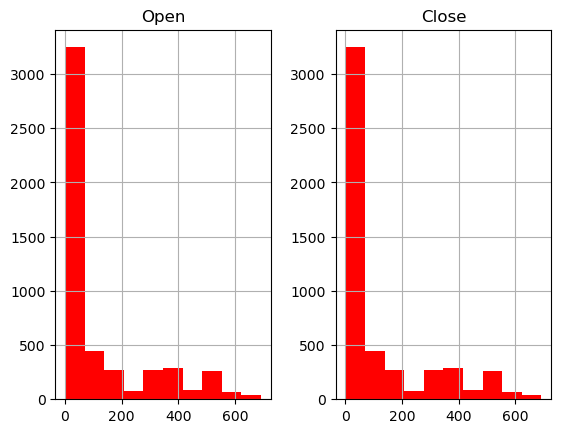

In [25]:
#Visualization of data
df.hist(color='red')

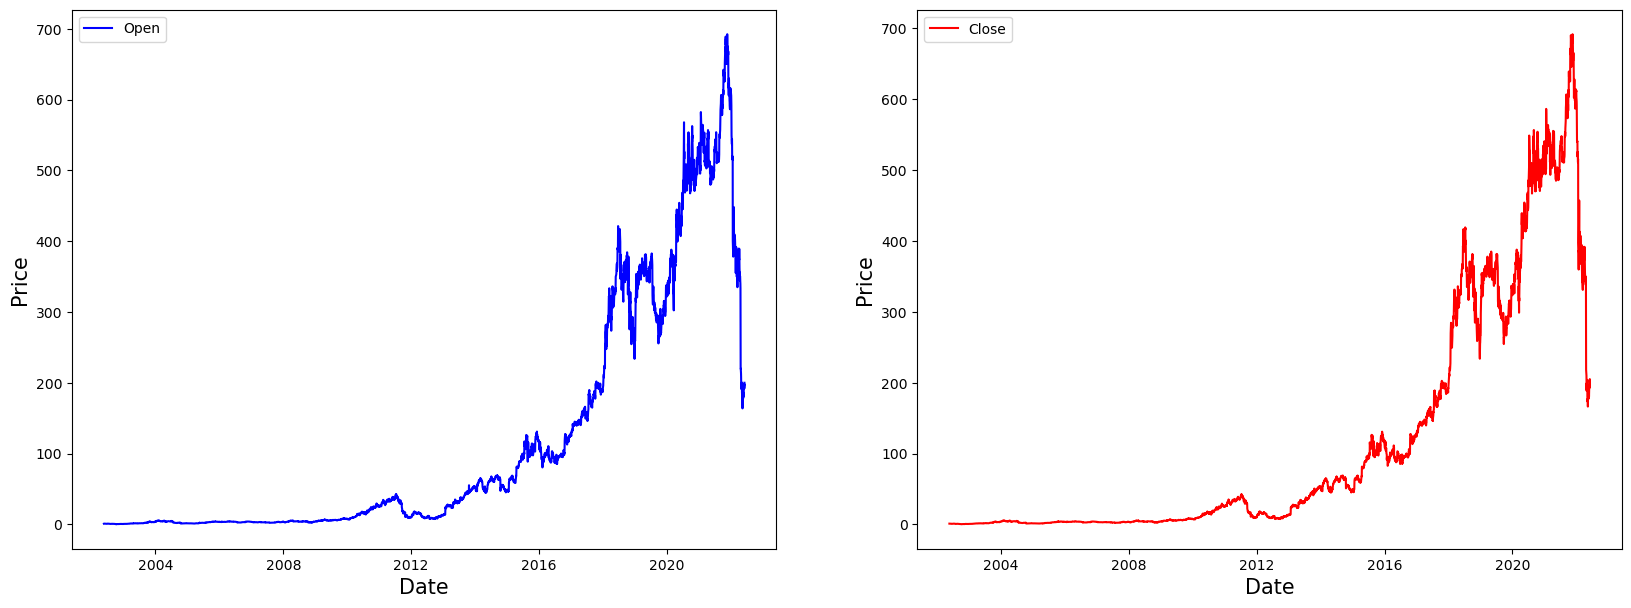

In [31]:
#plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [32]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2002-05-23,0.001125,0.001191
2002-05-24,0.001209,0.001211
2002-05-28,0.001208,0.001134
2002-05-29,0.001137,0.001057
2002-05-30,0.001055,0.001010
2002-05-31,0.001013,0.001018
2002-06-03,0.001015,0.001093
2002-06-04,0.001095,0.001078
2002-06-05,0.001059,0.001120


In [33]:
df.tail(10)

,Open,Close
Date,,
2022-05-20,0.268063,0.269019
2022-05-23,0.268468,0.270595
2022-05-24,0.262470,0.260325
2022-05-25,0.259985,0.271159
2022-05-26,0.268959,0.276323
2022-05-27,0.278641,0.281806
2022-05-31,0.282962,0.285060
2022-06-01,0.286604,0.278508
2022-06-02,0.276951,0.296126


In [34]:
# splitting the data into train and test set
# Select 75 % for train and 25 % for test
training_size = round(len(df) * 0.75) 

In [35]:
training_size

3783

In [36]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((3783, 2), (1261, 2))

In [37]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [38]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((3733, 50, 2), (3733, 2), (1211, 50, 2), (1211, 2))

In [39]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=25))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 2)                 52        
                                                                 
Total params: 7952 (31.06 KB)
Trainable params: 7952 (31.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
117/117 [==============================] - 24s 82ms/step - loss: 1.0271e-04 - mean_absolute_error: 0.0054 - val_loss: 0.0141 - val_mean_absolute_error: 0.0936
Epoch 2/100
117/117 [==============================] - 7s 60ms/step - loss: 2.7912e-05 - mean_absolute_error: 0.0031 - val_loss: 0.0111 - val_mean_absolute_error: 0.0843
Epoch 3/100
117/117 [==============================] - 7s 62ms/step - loss: 2.6501e-05 - mean_absolute_error: 0.0031 - val_loss: 0.0063 - val_mean_absolute_error: 0.0613
Epoch 4/100
117/117 [==============================] - 7s 59ms/step - loss: 2.8241e-05 - mean_absolute_error: 0.0034 - val_loss: 0.0036 - val_mean_absolute_error: 0.0442
Epoch 5/100
117/117 [==============================] - 7s 60ms/step - loss: 2.3880e-05 - mean_absolute_error: 0.0029 - val_loss: 0.0043 - val_mean_absolute_error: 0.0509
Epoch 6/100
117/117 [==============================] - 7s 62ms/step - loss: 2.2760e-05 - mean_absolute_error: 0.0028 - val_loss: 0.0042 - val_mean_ab

In [45]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

38/38 [==============================] - 1s 14ms/step


array([[0.24510953, 0.24296467],
       [0.24486578, 0.24275039],
       [0.24270761, 0.24065346],
       [0.24247162, 0.24043141],
       [0.23909862, 0.23710041]], dtype=float32)

In [46]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[169.98682, 168.3385 ],
       [169.81815, 168.19037],
       [168.32475, 166.74072],
       [168.16145, 166.58722],
       [165.82744, 164.28444]], dtype=float32)

In [49]:
df1 = pd.concat([df.iloc[-202:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-1211:].index)], axis=1)

In [50]:
# Inversing normalization/scaling 
df1[['Open','Close']] = MMS.inverse_transform(df1[['Open','Close']])
df1.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2017-08-14,NaN,NaN,169.986816,168.338501
2017-08-15,NaN,NaN,169.818146,168.190369
2017-08-16,NaN,NaN,168.324753,166.740723
2017-08-17,NaN,NaN,168.161453,166.587219
2017-08-18,NaN,NaN,165.827438,164.284439


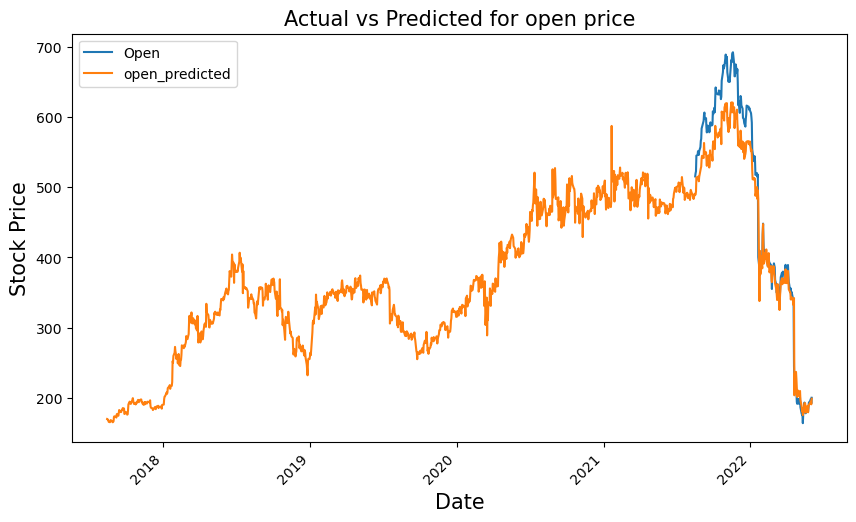

In [51]:
# plotting the actual open and predicted open prices on date index
df1[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

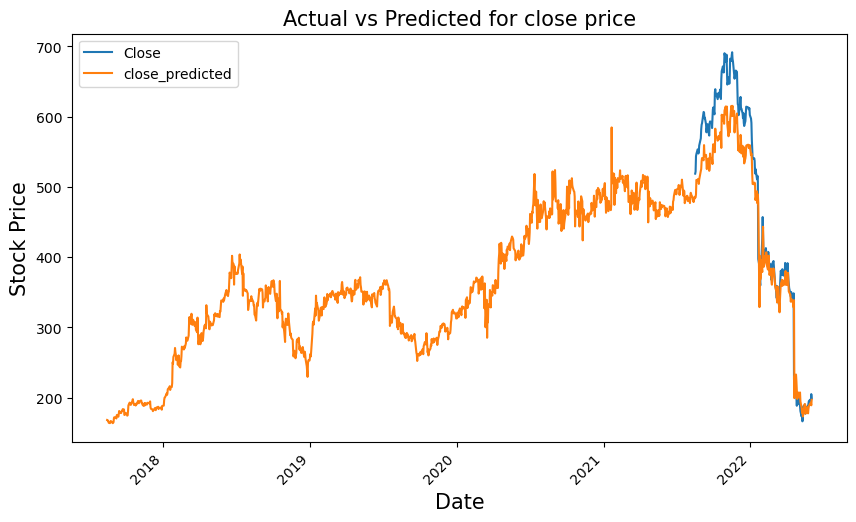

In [52]:
# plotting the actual close and predicted close prices on date index 
df1[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [53]:
df1

,Open,Close,open_predicted,close_predicted
Date,,,,
2017-08-14,NaN,NaN,169.986816,168.338501
2017-08-15,NaN,NaN,169.818146,168.190369
2017-08-16,NaN,NaN,168.324753,166.740723
2017-08-17,NaN,NaN,168.161453,166.587219
2017-08-18,NaN,NaN,165.827438,164.284439
...,...,...,...,...
2022-05-27,193.190002,195.190002,190.058228,188.270157
2022-05-31,196.179993,197.440002,193.666977,191.930374
2022-06-01,198.699997,192.910004,194.697464,193.004456


In [54]:
# Creating a dataframe and adding 10 days to existing index 

df2 = pd.concat([df1,pd.DataFrame(columns=df1.columns,
                                        index=pd.date_range(start=df1.index[-1], periods=11, freq='D'))],axis=0)
df2['2022-02-03':'2022-02-21']

,Open,Close,open_predicted,close_predicted
2022-02-03,421.440002,405.600006,409.018066,404.663971
2022-02-04,407.309998,410.170013,391.249756,386.465912
2022-02-07,410.170013,402.100006,406.715454,401.756165
2022-02-08,398.179993,403.529999,398.221832,393.251953
2022-02-09,408.649994,412.890015,397.843719,392.977600
2022-02-10,402.100006,406.269989,411.487152,406.989227
2022-02-11,405.329987,391.309998,394.013153,389.595856
2022-02-14,387.589996,396.570007,386.802399,382.471802
2022-02-15,403.790009,407.459991,389.176025,384.827728
2022-02-16,401.529999,398.079987,406.187103,402.163940


In [55]:
# creating a DataFrame and filling values of open and close column
forthcoming_prediction = pd.DataFrame(columns=['open','close'],index=df1.index)
forthcoming_prediction.index=pd.to_datetime(forthcoming_prediction.index)

In [56]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  forthcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 33ms/step


In [57]:
# inversing Normalization/scaling
forthcoming_prediction[['open','close']] = MMS.inverse_transform(forthcoming_prediction[['open','close']])

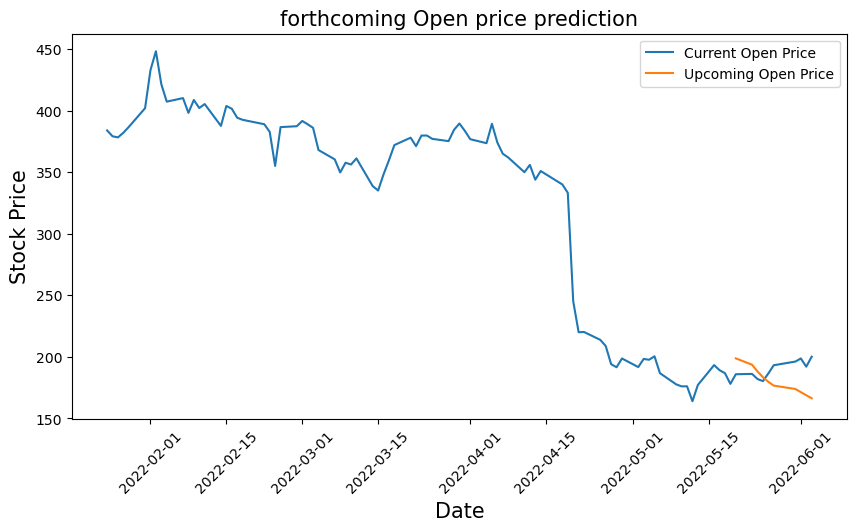

In [58]:
# plotting forthcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Open'],label='Current Open Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming Open price prediction',size=15)
ax.legend()
fig.show()

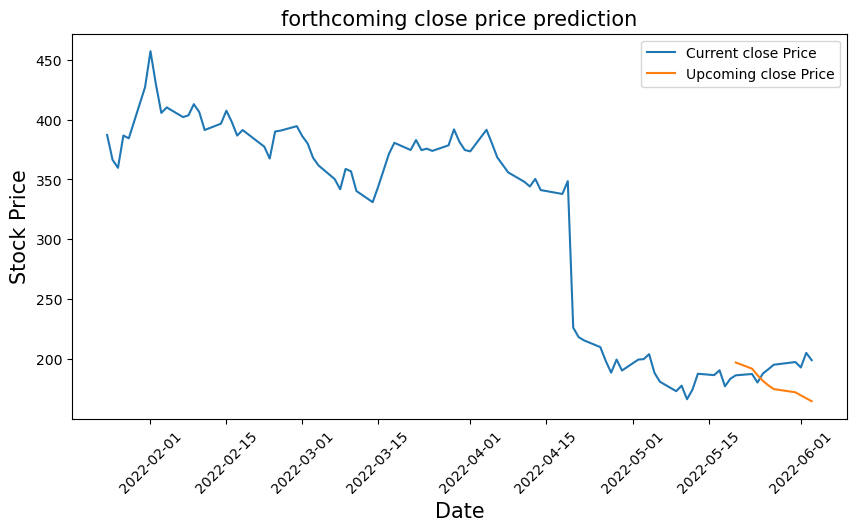

In [59]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()